In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

In [2]:
torch.manual_seed(1) 
x = torch.linspace(-1, 1, 300) #define the x
x = torch.unsqueeze(x, 1) #reshape x
y = (np.sin(5*np.pi*x))/(5*np.pi*x) #non-linear y function
print('Xshape:',x.shape,"\n Yshape:",y.shape)

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


/local_scratch/slurm.684285/ipykernel_2648895/4122333026.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


Text(0, 0.5, 'Dependent varible')

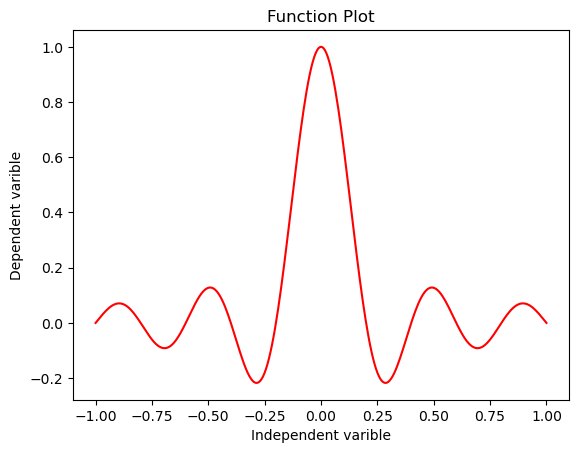

In [3]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')

In [4]:
class NN1(nn.Module):
    def __init__(self,):
        super(NN1, self).__init__()
        self.fc1 = nn.Linear(1, 400)
        self.fc2 = nn.Linear(400, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
def trainFunc(model,x,y):
    max_epoch = 3000
    epoch_array = []
    loss_array = []
    gradArray = []
    not_converged = True
    epoch = 0
           
    while not_converged:
        prediction = model(x)      # for each x it the modedl predicts
        loss = loss_function(prediction, y) #calculate the loss
        optimizer.zero_grad()  #clearing gradients for next training, otherwise it provides wrong result
        loss.backward()         # backpropagation for computing gradients
        
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        #Generating Gradient Norm
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        optimizer.step() 
        
        gradArray.append(grad_norm)
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}, grad_norm = {grad_norm}') #, weight = {model.weight.item()},  bias ={model.bias.item()}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 1.0e-05:
                print("Convergeance reached for loss:",loss_array[-1])
                not_converged = False

    return epoch_array,loss_array,prediction,grad_norm,gradArray

In [6]:
torch.manual_seed(1)
m1 = NN1()     # define the network
optimizer = torch.optim.Adam(m1.parameters(), lr=1e-3, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

Total no of parameters in Model 1: 1201


In [7]:
M1epoch_arr,M1loss_arr,M1prediction,M1grad_norm,M1gradArr = trainFunc(m1,x,y)

epoch: 100, loss = 0.0554, grad_norm = 0.044051877069677094
epoch: 200, loss = 0.0368, grad_norm = 0.03198461185726433
epoch: 300, loss = 0.0218, grad_norm = 0.02414036146115813
epoch: 400, loss = 0.0127, grad_norm = 0.015882743079653355
epoch: 500, loss = 0.0082, grad_norm = 0.010343113159848986
epoch: 600, loss = 0.0060, grad_norm = 0.007429255929389532
epoch: 700, loss = 0.0047, grad_norm = 0.005374075757579235
epoch: 800, loss = 0.0039, grad_norm = 0.004475229033425285
epoch: 900, loss = 0.0031, grad_norm = 0.004208481544555263
epoch: 1000, loss = 0.0025, grad_norm = 0.02074745147803664
epoch: 1100, loss = 0.0021, grad_norm = 0.0056377457170072535
epoch: 1200, loss = 0.0017, grad_norm = 0.02134505929694428
epoch: 1300, loss = 0.0015, grad_norm = 0.004968533007325417
epoch: 1400, loss = 0.0013, grad_norm = 0.014730776292785033
epoch: 1500, loss = 0.0011, grad_norm = 0.00867795065160361
epoch: 1600, loss = 0.0010, grad_norm = 0.016754107207058493
Convergeance reached for loss: 0.0009

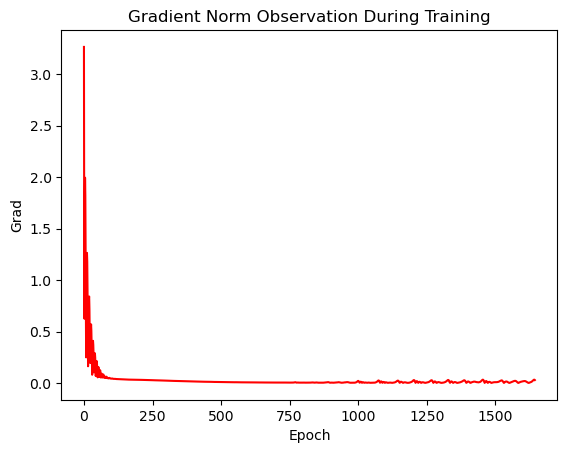

In [8]:
plt.plot(M1epoch_arr,M1gradArr,color="red")
plt.title('Gradient Norm Observation During Training')
plt.xlabel("Epoch")
plt.ylabel("Grad")
plt.show()

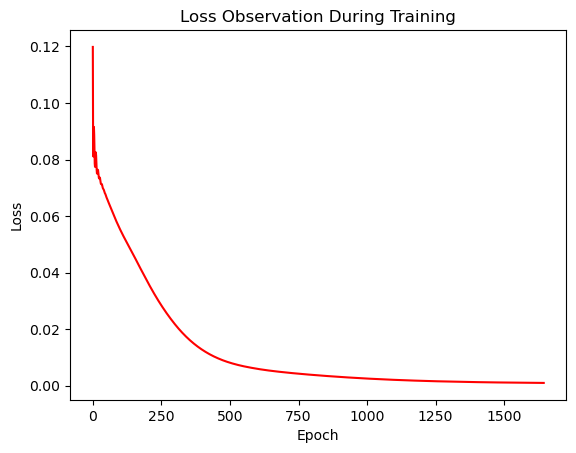

In [9]:
plt.plot(M1epoch_arr,M1loss_arr,color="red")
plt.title('Loss Observation During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()